In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf
import pickle

In [32]:
# Fetching data from Yahoo Finance
data = yf.download("AAPL", start="2022-01-01", end="2022-12-31")
df = data.reset_index()

[*********************100%%**********************]  1 of 1 completed


In [33]:
# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close_normalized'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))


In [50]:
# Extracting features and target variable
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
y = df['Close_normalized'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Training model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [52]:
# Evaluating model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 5.5891925635919194e-12


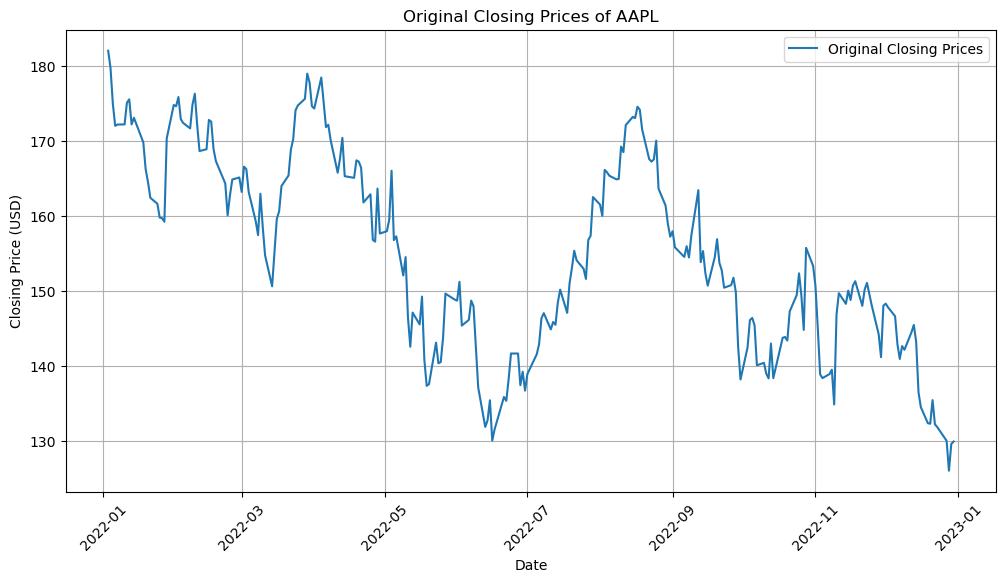

In [53]:
# Visualize original closing prices against dates
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Original Closing Prices')
plt.title('Original Closing Prices of AAPL')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

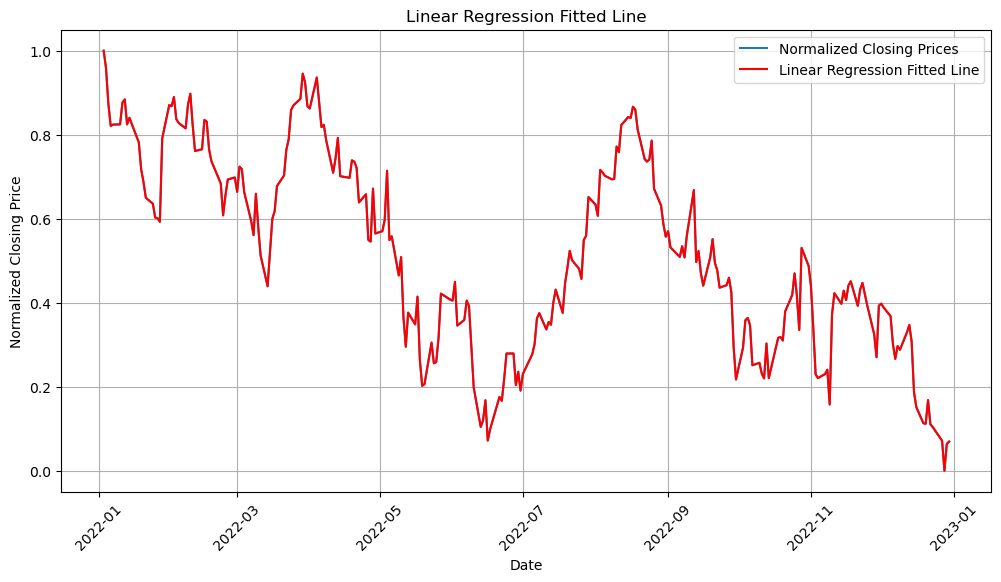

In [54]:
# Visualize linear regression line fitted to training data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close_normalized'], label='Normalized Closing Prices')
plt.plot(df['Date'], model.predict(X), color='red', label='Linear Regression Fitted Line')
plt.title('Linear Regression Fitted Line')
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

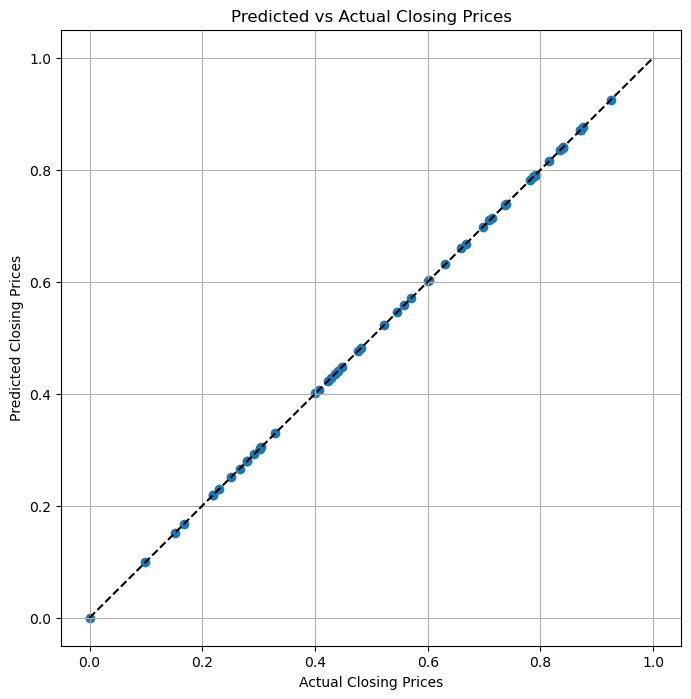

In [55]:
# Visualize predicted closing prices against actual closing prices
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], '--k')
plt.title('Predicted vs Actual Closing Prices')
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.grid(True)
plt.show()

In [64]:
# Save the trained model as a .pkl file
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)
# Load MinMaxScaler from the .pkl file
with open('linear_regression_model.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [65]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Close_normalized'],
      dtype='object')


In [58]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close_normalized
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724533,104487900,1.000000
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443573,99310400,0.958728
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723572,94537600,0.873325
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840240,96904000,0.821154
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008118,86709100,0.824192


In [59]:
# Predicting normalized closing prices
predicted_normalized_prices = model.predict(X)

# Printing the predicted normalized closing prices
print(predicted_normalized_prices)


[ 1.00000000e+00  9.58727929e-01  8.73325046e-01  8.21154267e-01
  8.24191576e-01  8.24548987e-01  8.76183787e-01  8.84223754e-01
  8.24548987e-01  8.40271785e-01  7.81847546e-01  7.18063238e-01
  6.87332464e-01  6.49812523e-01  6.35697664e-01  6.02822972e-01
  6.01215033e-01  5.92817654e-01  7.91316884e-01  8.70823717e-01
  8.67786408e-01  8.89762393e-01  8.37234203e-01  8.28122276e-01
  8.15079649e-01  8.71717107e-01  8.97623792e-01  8.23298186e-01
  7.61122090e-01  7.65410200e-01  8.35268853e-01  8.30981016e-01
  7.65410200e-01  7.37180755e-01  6.83938017e-01  6.08004472e-01
  6.55708572e-01  6.93407355e-01  6.98231172e-01  6.63927109e-01
  7.23959287e-01  7.18063238e-01  6.63391129e-01  5.94247024e-01
  5.61014921e-01  6.59460430e-01  5.80311007e-01  5.12596000e-01
  4.39163784e-01  5.19028028e-01  5.99428252e-01  6.17830948e-01
  6.77863126e-01  7.02876692e-01  7.64338240e-01  7.89172965e-01
  8.58138501e-01  8.69751758e-01  8.85474555e-01  9.45506733e-01
  9.24245297e-01  8.67786

In [60]:
# Inverse transform to get original scale of closing prices
predicted_closing_prices = scaler.inverse_transform(predicted_normalized_prices.reshape(-1, 1))

# Printing the predicted closing prices in the original scale
print(predicted_closing_prices)


[[182.00999451]
 [179.69999695]
 [174.91999817]
 [172.        ]
 [172.16999817]
 [172.19000244]
 [175.08000183]
 [175.52999878]
 [172.19000244]
 [173.07000732]
 [169.80000305]
 [166.22999573]
 [164.50999451]
 [162.41000366]
 [161.61999512]
 [159.77999878]
 [159.69000244]
 [159.22000122]
 [170.33000183]
 [174.77999878]
 [174.61000061]
 [175.83999634]
 [172.8999939 ]
 [172.38999939]
 [171.66000366]
 [174.83000183]
 [176.27999878]
 [172.11999512]
 [168.63999939]
 [168.88000488]
 [172.78999329]
 [172.55000305]
 [168.88000488]
 [167.30000305]
 [164.32000732]
 [160.07000732]
 [162.74000549]
 [164.8500061 ]
 [165.11999512]
 [163.19999695]
 [166.55999756]
 [166.22999573]
 [163.16999817]
 [159.30000305]
 [157.44000244]
 [162.94999695]
 [158.52000427]
 [154.72999573]
 [150.61999512]
 [155.08999634]
 [159.58999634]
 [160.61999512]
 [163.97999573]
 [165.38000488]
 [168.82000732]
 [170.21000671]
 [174.07000732]
 [174.72000122]
 [175.6000061 ]
 [178.96000671]
 [177.77000427]
 [174.61000061]
 [174.30